## Visualizing a Categorical and a Quantitative Variable

Categorical variables are present in nearly every dataset, but they are especially prominent in survey data. In this chapter, you will learn how to create and customize categorical plots such as box plots, bar plots, count plots, and point plots. Along the way, you will explore survey data from young people about their interests, students about their study habits, and adult men about their feelings about masculinity.

**Categorical plots**  
* Examples: count plots, bar plots  
* Involve a categorical variable  
* Comparisons between groups  

**catplot()**  
* Used to create categorical plots
* Same advantages of relplot()
* Easily create subplots with col= and row=

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

csv_path = 'young-people-survey-responses.csv'

survey_data = pd.read_csv(csv_path)
survey_data['Age Category'] = ['Less than 21' if x < 21.0 else '21 and older' for x in survey_data['Age']] 
display(survey_data.head(2))

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town,Age Category
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village,Less than 21
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city,Less than 21


### Count plots

In this exercise, we'll return to exploring our dataset that contains the responses to a survey sent out to young people. We might suspect that young people spend a lot of time on the internet, but how much do they report using the internet each day? Let's use a count plot to break down the number of survey responses in each category and then explore whether it changes based on age.

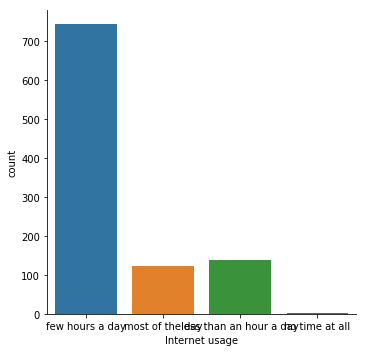

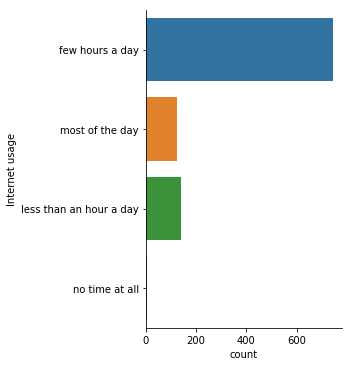

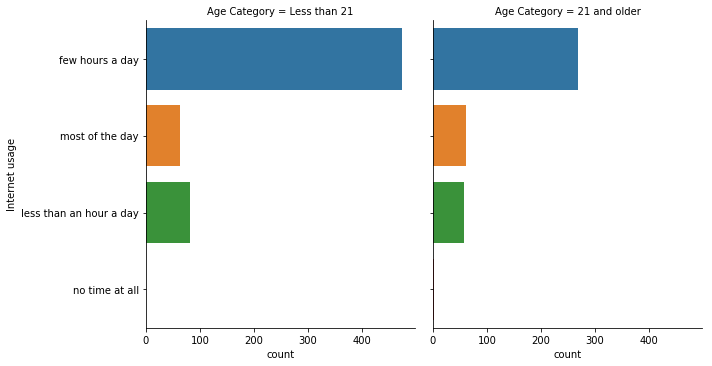

In [9]:
# Use sns.catplot() to create a count plot using the survey_data DataFrame with "Internet usage" on the x-axis.
sns.catplot(data=survey_data, x="Internet usage", kind="count")

#Make the bars horizontal instead of vertical.
sns.catplot(data=survey_data, y="Internet usage", kind="count")

# Create column subplots based on "Age Category", which separates respondents into those that are younger than 21 vs. 21 and older.
sns.catplot(data=survey_data, y="Internet usage", kind="count", col="Age Category")


### Bar plots with percentages

**Condence intervals**
* Lines show 95% condence intervals for the mean
* Shows uncertainty about our estimate
* Assumes our data is a random sample

Let's continue exploring the responses to a survey sent out to young people. The variable '"Interested in Math"' is True if the person reported being interested or very interested in mathematics, and False otherwise. What percentage of young people report being interested in math, and does this vary based on gender? Let's use a bar plot to find out.

As a reminder, we'll create a bar plot using the 'catplot() function, providing the name of categorical variable to put on the x-axis (`x=____`), the name of the quantitative variable to summarize on the y-axis (`y=____`), the Pandas DataFrame to use (`data=____`), and the type of categorical plot (`kind="bar"`).

C:\Users\Jacob\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


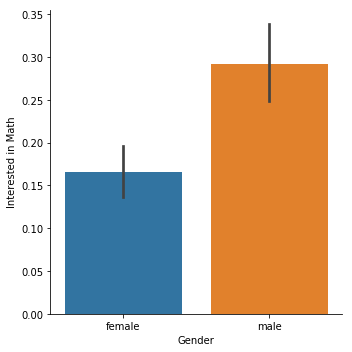

In [11]:
survey_data['Interested in Math'] = [False if x < 4.0 else True for x in survey_data['Mathematics']] 

# Use the survey_data DataFrame and sns.catplot() to create a bar plot with "Gender" on the x-axis 
# and "Interested in Math" on the y-axis.
sns.catplot(data=survey_data, x="Gender", y="Interested in Math", kind="bar")


### Customizing bar plots

In this exercise, we'll explore data from students in secondary school. The `"study_time"` variable records each student's reported weekly study time as one of the following categories: `"<2 hours"`, `"2 to 5 hours"`, `"5 to 10 hours"`, or `">10 hours"`. Do students who report higher amounts of studying tend to get better final grades? Let's compare the average final grade among students in each category using a bar plot.

In [12]:
csv_path = 'student-alcohol-consumption.csv'

student_data = pd.read_csv(csv_path)

display(student_data.head(2))

,Unnamed: 0,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,0,GP,F,18,GT3,A,4,4,2,0,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,1,GP,F,17,GT3,T,1,1,1,0,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours


C:\Users\Jacob\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


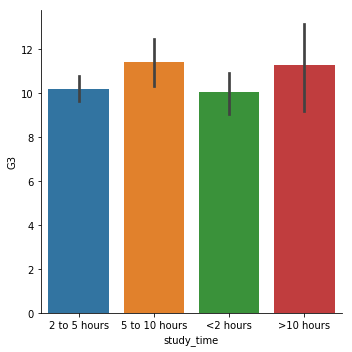

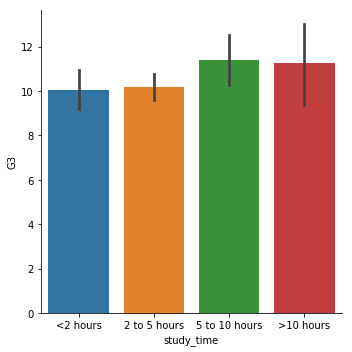

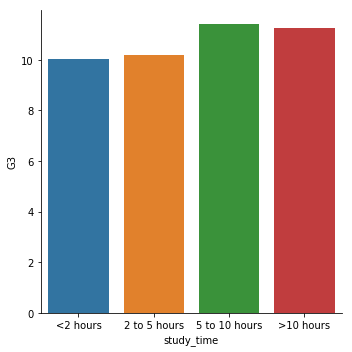

In [14]:
# Create bar plot of average final grade in each study category
# Use sns.catplot() to create a bar plot with "study_time" on the x-axis and final grade ("G3") on the y-axis, 
# using the student_data DataFrame.
sns.catplot(data=student_data, x="study_time", y="G3", kind="bar")

# Using the order parameter, rearrange the categories so that they are in order from lowest study time to highest.
study_order = ["<2 hours", "2 to 5 hours", "5 to 10 hours", ">10 hours"]
sns.catplot(data=student_data, x="study_time", y="G3", kind="bar", order=study_order)

#Update the plot so that it no longer displays confidence intervals.
sns.catplot(data=student_data, x="study_time", y="G3", kind="bar", order=study_order, ci=None)


### Create and interpret a box plot

**Whatis a box plot?**
* Shows the distribution of quantitative data
* See median, spread, skewness, and outliers
* Any box shows the quartiles(25% to 75% of the dataset while the whiskers extend to show the rest of the distribution (by default `1.5*Inter-quartile Range`(IQR) .
* Facilitates comparisons between groups 

Let's continue using the `student_data` dataset. In an earlier exercise, we explored the relationship between studying and final grade by using a bar plot to compare the average final grade (`"G3"`) among students in different categories of `"study_time"`.

In this exercise, we'll try using a box plot look at this relationship instead. As a reminder, to create a box plot you'll need to use the `catplot()` function and specify the name of the categorical variable to put on the x-axis (`x=____`), the name of the quantitative variable to summarize on the y-axis (`y=____`), the Pandas DataFrame to use (`data=____`), and the type of plot (kind="box").


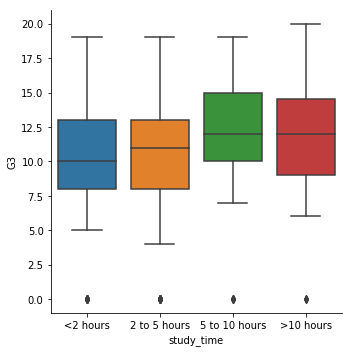

In [15]:
# Specify the category ordering
study_time_order = ["<2 hours", "2 to 5 hours", 
                    "5 to 10 hours", ">10 hours"]

# Create a box plot and set the order of the categories
sns.catplot(kind="box", data=student_data, x="study_time", y="G3", order=study_time_order)



### Omitting outliers

Now let's use the student_data dataset to compare the distribution of final grades (`"G3"`) between students who have internet access at home and those who don't. To do this, we'll use the `"internet"` variable, which is a binary (yes/no) indicator of whether the student has internet access at home.

Since internet may be less accessible in rural areas, we'll add subgroups based on where the student lives. For this, we can use the `"location"` variable, which is an indicator of whether a student lives in an urban ("Urban") or rural ("Rural") location.

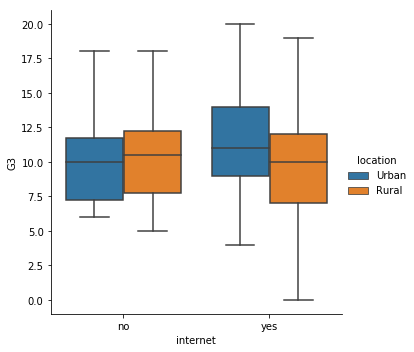

In [16]:
# Create a box plot with subgroups and omit the outliers
# Use sns.catplot() to create a box plot with the student_data DataFrame, putting "internet" on the x-axis and "G3" on the y-axis.
# Add subgroups so each box plot is colored based on "location".
# Do not display the outliers.
sns.catplot(kind="box", data=student_data, x="internet", y="G3", hue="location", sym="")


### Adjusting the whiskers

In the lesson we saw that there are multiple ways to define the whiskers in a box plot. In this set of exercises, we'll continue to use the `student_data` dataset to compare the distribution of final grades (`"G3"`) between students who are in a romantic relationship and those that are not. We'll use the `"romantic"` variable, which is a yes/no indicator of whether the student is in a romantic relationship.

Let's create a box plot to look at this relationship and try different ways to define the whiskers.

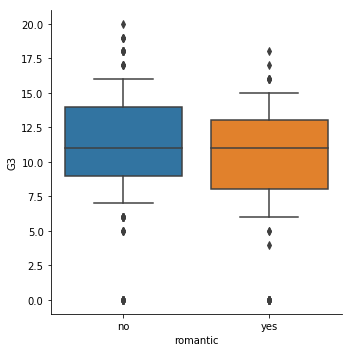

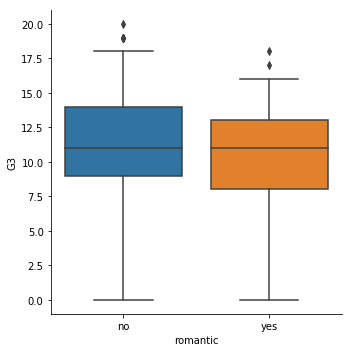

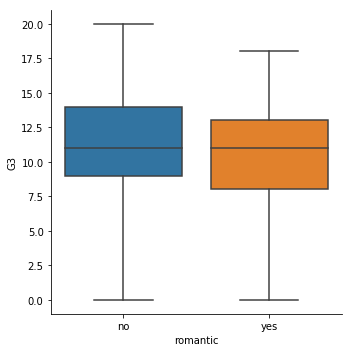

In [19]:
# Set the whiskers to 0.5 * IQR
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            whis=0.5)

# Extend the whiskers to the 5th and 95th percentile
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            whis=[5, 95])

# Set the whiskers at the min and max values
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            whis=[0, 100])


### Point Plots

**What are point plots?**
* Points show __mean__ of quantitative variable
* Vertical lines show 95% __condence intervals__  

**Point plots vs. line plots**  
* Both show:  
    * Mean of quantitative variable
    * 95% condence intervals for the mean  
* Differences:
    * Line plot has quantitative variable (usually time) on x-axis
    * Point plot has categorical variable on x-axis


### Customizing point plots

Let's continue to look at data from students in secondary school, this time using a point plot to answer the question: does the quality of the student's family relationship influence the number of absences the student has in school? Here, we'll use the `"famrel"` variable, which describes the quality of a student's family relationship from 1 (very bad) to 5 (very good).

As a reminder, to create a point plot, use the `catplot()` function and specify the name of the categorical variable to put on the x-axis (`x=____`), the name of the quantitative variable to summarize on the y-axis (y=`____`), the Pandas DataFrame to use (`data=____`), and the type of categorical plot (`kind="point"`).

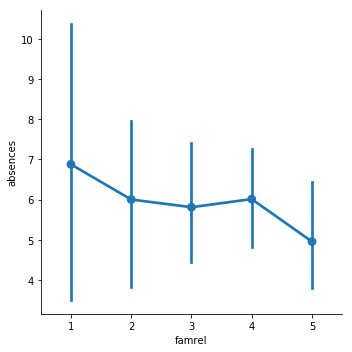

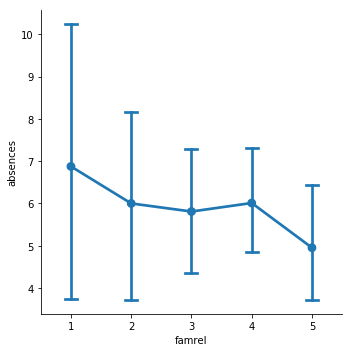

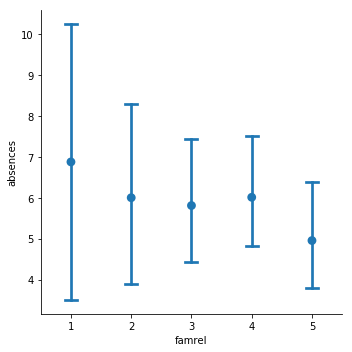

In [23]:
# Use sns.catplot() and the student_data DataFrame to create a point plot with "famrel" on the x-axis 
# and number of absences ("absences") on the y-axis.
sns.catplot(data=student_data, x="famrel", y="absences", kind="point")

# Add caps to the confidence interval
sns.catplot(data=student_data, x="famrel", y="absences", kind="point", capsize=0.2)

# Remove the lines joining the points
sns.catplot(x="famrel", y="absences",
			data=student_data,
            kind="point",
            capsize=0.2,
            join=False)


### Point plots with subgroups

Let's continue exploring the dataset of students in secondary school. This time, we'll ask the question: is being in a romantic relationship associated with higher or lower school attendance? And does this association differ by which school the students attend? Let's find out using a point plot.

C:\Users\Jacob\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


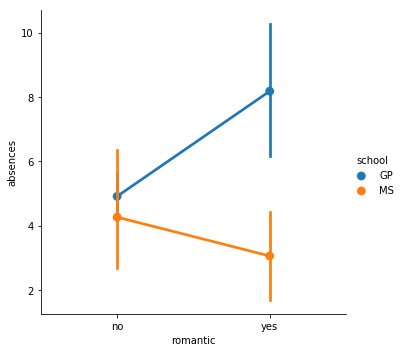

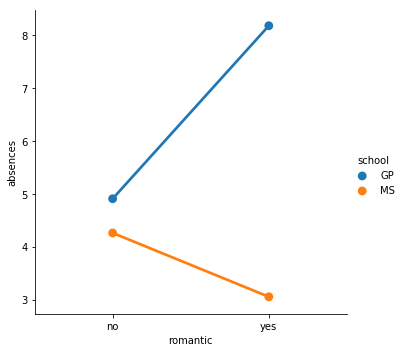

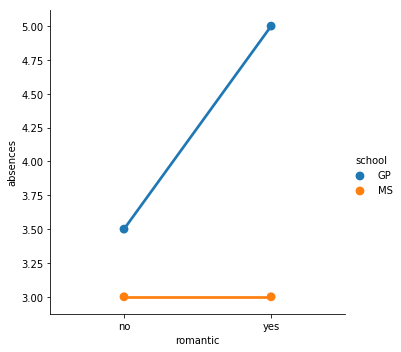

In [26]:
# Use sns.catplot() and the student_data DataFrame 
# to create a point plot with relationship status ("romantic") on the x-axis 
# and number of absences ("absences") on the y-axis. 
# Create subgroups based on the school that they attend ("school")
sns.catplot(kind="point", data=student_data, x="romantic", y="absences", hue="school")

# Turn off the confidence intervals for the plot.
sns.catplot(kind="point", data=student_data, x="romantic", y="absences", hue="school", ci=None)

# Since there may be outliers of students with many absences, 
# import the median function from numpy and display the median number of absences instead of the average.
from numpy import median
sns.catplot(kind="point", data=student_data, x="romantic", y="absences", hue="school", ci=None, estimator=median)

